In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
churn_df = pd.read_csv('churn.csv')

# Supervised Learning
- Supervised learning involves training models on labeled data to make predictions.
- It includes two main types: classification (predicting categories) and regression (predicting continuous values).
- The data must be clean, numeric, and formatted properly before modeling.
- The scikit-learn library uses a consistent syntax: create a model, fit it to data, and make predictions.
- This approach helps in tasks like spam detection or property price prediction.

In [ ]:
from sklearn.module import Model

model = Model()
model.fit(X,y)
predictions = model.predict(X_new)
print(predictions)

# Classifying labels of unseen data
1. Build a model
2. Model learns from the labbelled data we pass to it
3. Pass unlabeled data to the model as input
4. Model predicts the labels of the unseen data

- labeled data = training data

# k-Nearest Neighbors
- Predict the label of a data point by 
    - Looking at the K closest labeled data points
    - Taking a mojority vote

(3, 2)
Predictions: [ True False False]


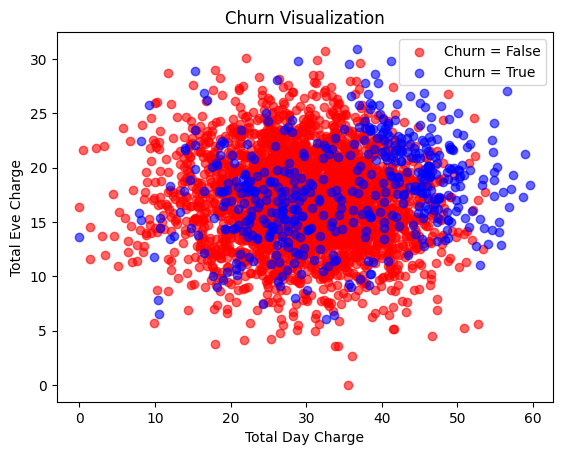

In [18]:
from sklearn.neighbors import KNeighborsClassifier

churn_df.columns

X = churn_df[['total day charge','total eve charge']].values
y = churn_df['churn'].values

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X,y)

X_new = np.array([[56.8,17.5],
                  [24.4,24.1],
                  [50.1,10.9]])

print(X_new.shape)

predictions = knn.predict(X_new)

print('Predictions: {}'.format(predictions))

# Separate data
churn_true = churn_df[churn_df['churn'] == 1]
churn_false = churn_df[churn_df['churn'] == 0]

# Plot
plt.scatter(
    churn_false['total day charge'],
    churn_false['total eve charge'],
    color='red',
    label='Churn = False',
    alpha=0.6
)

plt.scatter(
    churn_true['total day charge'],
    churn_true['total eve charge'],
    color='blue',
    label='Churn = True',
    alpha=0.6
)

# Labels
plt.xlabel('Total Day Charge')
plt.ylabel('Total Eve Charge')
plt.legend()
plt.title('Churn Visualization')

plt.show()

# Measuring model performance


- Larger K = less complex model = can cause underfitting
- Smaller K = more complex model = can lead to overfitting


- Underfitting happens when a model is too simple to capture the underlying patterns in the data. It performs poorly on both training and test data because it hasn't learned enough from the data.

- Overfitting occurs when a model is too complex and captures noise or random fluctuations in the training data. It performs very well on training data but poorly on new, unseen data because it has learned the noise as if it were a pattern.


In [20]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y) 

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

0.872


# Model complexity and over/underfitting 

{np.int64(1): 1.0, np.int64(2): 0.9061294470638662, np.int64(3): 0.9048435490784398, np.int64(4): 0.8911273039005573, np.int64(5): 0.8906986712387484, np.int64(6): 0.8851264466352337, np.int64(7): 0.8829832833261895, np.int64(8): 0.8825546506643807, np.int64(9): 0.8834119159879983, np.int64(10): 0.8825546506643807, np.int64(11): 0.8812687526789541, np.int64(12): 0.8804114873553365, np.int64(13): 0.8816973853407629, np.int64(14): 0.8799828546935277, np.int64(15): 0.8834119159879983, np.int64(16): 0.8812687526789541, np.int64(17): 0.8808401200171453, np.int64(18): 0.8795542220317188, np.int64(19): 0.8786969567081011, np.int64(20): 0.8808401200171453, np.int64(21): 0.8808401200171453, np.int64(22): 0.8782683240462923, np.int64(23): 0.8821260180025718, np.int64(24): 0.8774110587226747, np.int64(25): 0.8812687526789541}


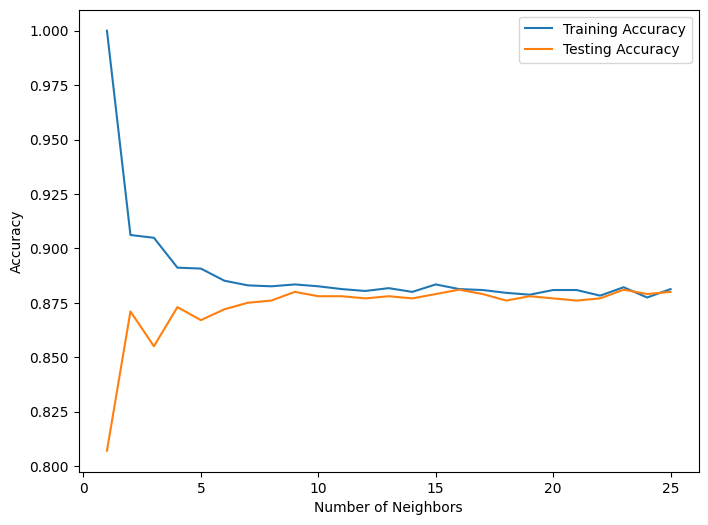

In [22]:
train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(1,26) 

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    train_accuracies[neighbor] = knn.score(X_train,y_train)
    test_accuracies[neighbor] = knn.score(X_test,y_test)

print(train_accuracies)

plt.figure(figsize=(8,6))
plt.plot(neighbors,train_accuracies.values(),label='Training Accuracy')
plt.plot(neighbors,test_accuracies.values(),label='Testing Accuracy')
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()